# 제목 : 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해보기

=====================================================================================================================================

## (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?
  
  
- 다변수 데이터에 대해 선형회귀를 하기 위한 데이터를 확인하고 모델 설계하기

In [1]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### 문자열 형태의 데이터를 실수로 변환하여야 한다.
- pandas 의 get_dummies() 함수를 활용해 문자열 데이터에 대해서 0, 1로 변환한다
  
  
- category data는 get_dummies() 함수로 손쉽게 원-핫 인코딩을 할 수 있다.

In [5]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker','day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [9]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 
             'smoker_Yes', 'smoker_No', 'day_Thur', 'day_Fri', 'day_Sat','day_Sun',
             'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


### 이번엔 함수를 어떻게 설정해줘야 할까?
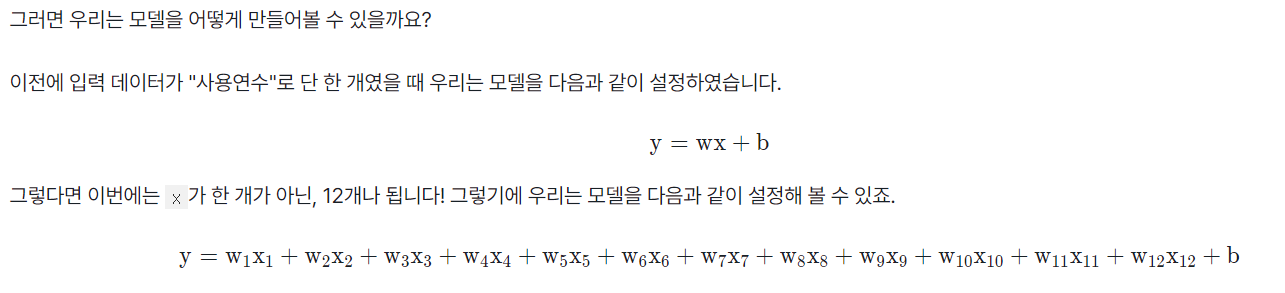

### 선형 회귀
- 이러한 방식을 __선형 방정식__ 이라고 한다.
  
   
- 중요한 것은, 각각의 x에 개별 가중치를 곱해주는 것 말고는 다른 조작을 하지 않는다는 것이다.
  
  
- 이렇게 선형 방정식을 활용해서 원하는 값을 예측하는 모델을 설계하고 학습시키는 방법을 __선형 회귀__ 라고 한다.
  
  
- 선형 회귀는 선형 방정식을 통해 __회귀 문제를 푼다__ 는 의미가 있다.
  
   
- 특히 __회귀__ 라는 단어는 __연속된 실수값을 예측하는 문제__ 를 뜻한다.
  
  - 대립되는 개념은 분류인데 다음 예가 있다.
    - 사진을 입력받아 해당 사진이 강아지인지, 고양이인지 맞히는 문제는 __분류__
    - 사용연수, 화면크기 등을 입력받아 실수값인 중고 가격을 맞히는 문제는 __회귀__
    
    
- 분류 문제는 맞히고자 하는 값이 __카테고리__ 이고, 
- 회귀 문제는 맞히고자 하는 값이 __연속된 실수값__ 이다.

---

## (2) 다시 한 번 직접 설계해 보는 손실함수

In [10]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [15]:
import numpy as np
W = np.random.rand(12) # 0 ~ 1의 난수값을 12개 생성
b = np.random.rand() # 0 ~ 1의 난수값을 1개 생성

In [16]:
W

array([0.76715459, 0.15966476, 0.38685865, 0.88639364, 0.42490782,
       0.43329576, 0.48482033, 0.03073148, 0.19716182, 0.10079899,
       0.00448677, 0.94122923])

In [19]:
b

0.7475130966463032

In [20]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [21]:
def MSE(a,b):
    mse = ((a-b)**2).mean() # 두 값의 차이의 제곱의 평균
    return mse

In [22]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

---

## (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기

In [25]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred -y)
    
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


In [26]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [14429.59171446  1730.3087075    412.36129545   207.43604609
   247.2016473    372.59569424   139.6342208     41.748777
   231.32268026   207.09166348   148.38190663   471.41543491]
db: 30.481836469054684


---

## (4) 모두 준비되었다면, 모델 학습은 간단하다구!

In [27]:
LEARNING_RATE = 0.0001

In [28]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i,L))

Iteration 10 : Loss 1.7189
Iteration 20 : Loss 1.6926
Iteration 30 : Loss 1.6786
Iteration 40 : Loss 1.6650
Iteration 50 : Loss 1.6520
Iteration 60 : Loss 1.6395
Iteration 70 : Loss 1.6274
Iteration 80 : Loss 1.6158
Iteration 90 : Loss 1.6046
Iteration 100 : Loss 1.5938
Iteration 110 : Loss 1.5834
Iteration 120 : Loss 1.5734
Iteration 130 : Loss 1.5636
Iteration 140 : Loss 1.5543
Iteration 150 : Loss 1.5452
Iteration 160 : Loss 1.5364
Iteration 170 : Loss 1.5279
Iteration 180 : Loss 1.5197
Iteration 190 : Loss 1.5117
Iteration 200 : Loss 1.5040
Iteration 210 : Loss 1.4965
Iteration 220 : Loss 1.4892
Iteration 230 : Loss 1.4821
Iteration 240 : Loss 1.4753
Iteration 250 : Loss 1.4686
Iteration 260 : Loss 1.4621
Iteration 270 : Loss 1.4559
Iteration 280 : Loss 1.4497
Iteration 290 : Loss 1.4438
Iteration 300 : Loss 1.4380
Iteration 310 : Loss 1.4323
Iteration 320 : Loss 1.4268
Iteration 330 : Loss 1.4214
Iteration 340 : Loss 1.4162
Iteration 350 : Loss 1.4111
Iteration 360 : Loss 1.4061
I

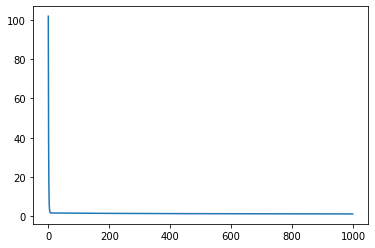

In [29]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [30]:
W, b

(array([ 0.08201824, -0.03272913,  0.30365168,  0.43308066,  0.12189343,
         0.19979021,  0.3866641 , -0.00287945, -0.13686057,  0.03006859,
        -0.06069618,  0.46989223]),
 0.7144964843626382)

In [31]:
prediction = model(x_test, W, b)
mse = loss(x_test, W, b, y_test)
mse

0.6793129610319666

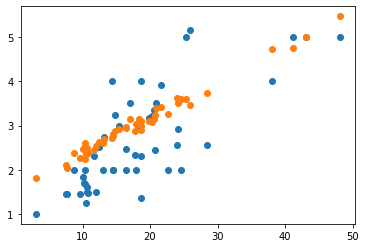

In [32]:
plt.scatter(x_test[:,0], y_test)
plt.scatter(x_test[:, 0], prediction)
plt.show()

---

## (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

In [33]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex','smoker','day','time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [34]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [37]:
model.fit(x_train, y_train)

LinearRegression()

In [38]:
predictions = model.predict(x_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

#### 모델 성능 지표 mse를 사용할건데 그 지표는 sklearn.metrics의 mean_squared_error에 있다.

In [40]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

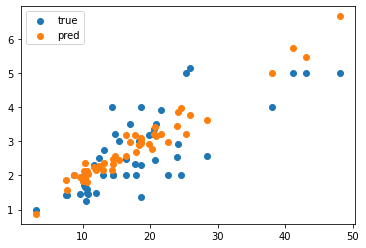

In [41]:
plt.scatter(x_test[:,0], y_test, label="true")
plt.scatter(x_test[:,0], predictions, label="pred")
plt.legend()
plt.show()